In [1]:
################################## Data Analysis & Calculation ##################################
import pandas as pd  
import numpy as np  

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 

#################### Model Building & data partition #####################
import statsmodels.api as sm   # stats + basic ml
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split  # purely ml


import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline
#plt.style.available[:5]
from wordcloud import WordCloud, STOPWORDS


# Data Import

In [2]:
df = pd.read_excel(r"C:\Users\Aniket Bangar\OneDrive\Desktop\CP 2\Data Model - Pizza Sales.xlsx\Data Model - Pizza Sales.xlsx")
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


# Univariate Analysis

In [4]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


# EDA 

In [5]:
# Count the occurrences of each category in the 'pizza_category' column
category_counts = df['pizza_category'].value_counts()

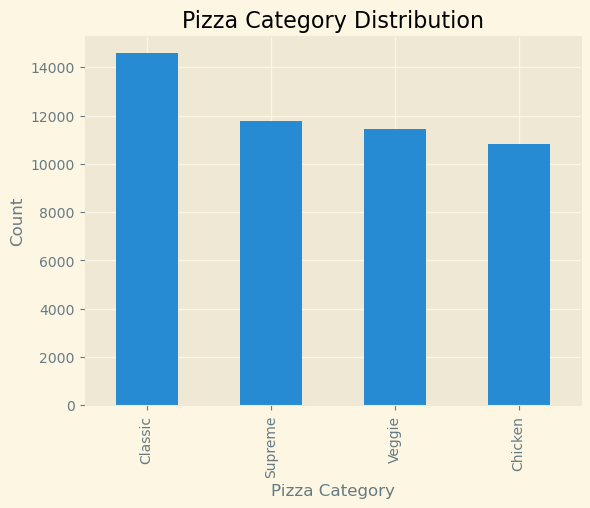

In [6]:
category_counts.plot(kind='bar')
plt.xlabel('Pizza Category')
plt.ylabel('Count')
plt.title('Pizza Category Distribution')
plt.show()

In [7]:
#price evaluation

df.total_price.value_counts().head(10)

20.75    8485
12.00    5465
16.00    4428
16.75    4211
16.50    3970
12.50    3278
20.25    2971
12.75    2485
20.50    1971
18.50    1310
Name: total_price, dtype: int64

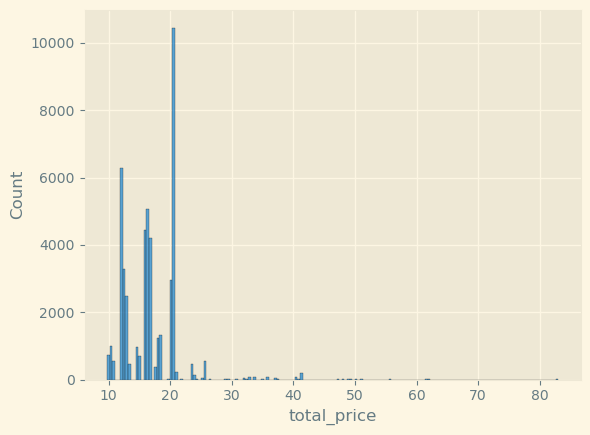

In [8]:
# price frequencies in histogram

sns.histplot(data=df[['total_price']],x='total_price')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [10]:
# diameter evaluation

df.pizza_size.max() # Maximum diameter of pizza in dataset


'XXL'

In [11]:
df.pizza_size.min() # minimum diameter of pizza in given dataset

'L'

In [12]:
df.pizza_size.value_counts()   

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

In [13]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


### Winsorizing Technique -- Treatment of Outlier

In [14]:
def outliers(new):
    a = new.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = new[i].quantile(0.25)
        q3 = new[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        new[i] = np.where(new[i]>upper_limit,upper_limit,new[i])
        new[i] = np.where(new[i]<lower_limit,lower_limit,new[i])

In [15]:
outliers(df)

<Axes: >

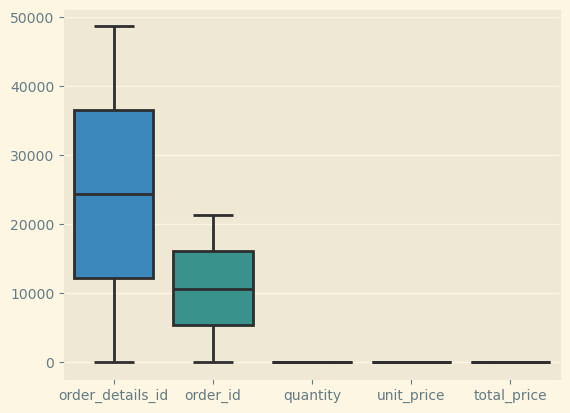

In [16]:
sns.boxplot(data=df)

### Missing Value

In [17]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [18]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [19]:
# Putting feature variable to X
X = df.drop('total_price', axis= 1)

# Putting response variable to y
y = df[['total_price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=110)

In [20]:
df = pd.concat([y_train, X_train], axis=1)
df.head()  

,total_price,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
38768,20.50,38769.0,17091.0,classic_dlx_l,1.0,2015-10-16,18:40:13,20.50,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
44073,20.25,44074.0,19367.0,mexicana_l,1.0,2015-11-26,18:58:02,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
34157,13.25,34158.0,15078.0,hawaiian_m,1.0,2015-09-09,18:28:38,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
27474,20.75,27475.0,12089.0,peppr_salami_l,1.0,2015-07-21,16:01:21,20.75,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
21335,12.00,21336.0,9356.0,big_meat_s,1.0,2015-06-06,17:39:19,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza


# Correlation Matrix

In [49]:
df.corr()

,total_price,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
total_price,1.000000,0.005121,0.005094,0.046589,NaN,0.005227,-0.026489,0.885338,-0.659569,-0.004062,-0.116935,0.002166
order_details_id,0.005121,1.000000,0.999993,0.002622,NaN,0.999987,0.002269,0.003380,-0.004136,-0.005240,-0.000091,0.003771
order_id,0.005094,0.999993,1.000000,0.002566,NaN,0.999988,0.002288,0.003352,-0.004107,-0.005270,-0.000105,0.003722
pizza_id,0.046589,0.002622,0.002566,1.000000,NaN,0.002539,0.001422,0.039248,0.019984,0.230395,0.226248,0.919663
quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,0.005227,0.999987,0.999988,0.002539,NaN,1.000000,-0.000640,0.003405,-0.004163,-0.005234,-0.000079,0.003710
order_time,-0.026489,0.002269,0.002288,0.001422,NaN,-0.000640,1.000000,-0.002841,0.005999,-0.000719,0.000269,-0.003057
unit_price,0.885338,0.003380,0.003352,0.039248,NaN,0.003405,-0.002841,1.000000,-0.792925,-0.021679,-0.137865,0.016050
pizza_size,-0.659569,-0.004136,-0.004107,0.019984,NaN,-0.004163,0.005999,-0.792925,1.000000,-0.050715,-0.024251,-0.084355
pizza_category,-0.004062,-0.005240,-0.005270,0.230395,NaN,-0.005234,-0.000719,-0.021679,-0.050715,1.000000,0.532717,0.279825


# Removing Irrelavent Variable

<Axes: >

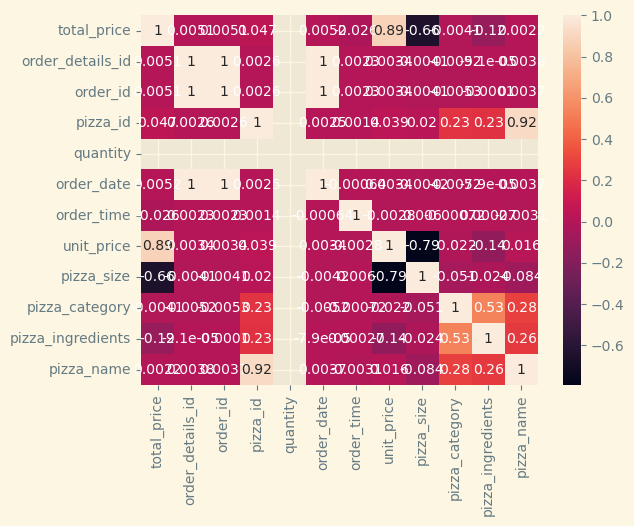

In [54]:
sns.heatmap(df.corr(),annot = True)

In [55]:
df.columns

Index(['total_price', 'order_details_id', 'order_id', 'pizza_id', 'quantity',
       'order_date', 'order_time', 'unit_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

### Multicolinearity (with the help of VIF)

In [56]:
df.shape

(34034, 12)

In [60]:
# Select only the numeric columns for VIF calculation
numeric_data = df.select_dtypes(include=[float, int])

# Add a constant term for the intercept in the regression model
X = sm.add_constant(numeric_data)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

NameError: name 'variance_inflation_factor' is not defined

# Method 2 - Variable selection Method
* Forward Selection Method
* Backward Selection Method

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [62]:
df.columns

Index(['total_price', 'order_details_id', 'order_id', 'pizza_id', 'quantity',
       'order_date', 'order_time', 'unit_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [63]:
# Encode categorical variables
categorical_cols = ['order_details_id', 'order_id', 'pizza_id', 'quantity',
       'order_date', 'order_time', 'unit_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [64]:

# Separate target and features
X = df.drop('total_price', axis=1)
y = df['total_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward feature selection using SequentialFeatureSelector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto')
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

# Forward Selection
def forward_selection(X, y):
    selected_features = []
    best_score = 0
    
    for i in range(X.shape[1]):
        remaining_features = [feature for feature in X.columns if feature not in selected_features]
        
        for feature in remaining_features:
            model = LinearRegression()
            model.fit(X[selected_features + [feature]], y)
            score = model.score(X[selected_features + [feature]], y)
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        selected_features.append(best_feature)
        print(f'Added {best_feature}, R-squared: {best_score:.4f}')
    
    return selected_features

In [65]:
# Backward Selection
def backward_selection(X, y):
    selected_features = X.columns.tolist()
    best_score = LinearRegression().fit(X, y).score(X, y)
    
    while True:
        scores = []
        for feature in selected_features:
            model = LinearRegression()
            model.fit(X.drop(feature, axis=1), y)
            score = model.score(X.drop(feature, axis=1), y)
            scores.append((feature, score))
        
        if all(score >= best_score for _, score in scores):
            break
        
        best_feature, best_new_score = sorted(scores, key=lambda x: x[1], reverse=True)[0]
        if best_new_score < best_score:
            selected_features.remove(best_feature)
            best_score = best_new_score
            print(f'Removed {best_feature}, R-squared: {best_score:.4f}')
        else:
            break
    
    return selected_features

In [66]:
# Run Forward Selection
print('Forward Selection:')
selected_features_forward = forward_selection(X, y)
print('Selected features:', selected_features_forward)

# Run Backward Selection
print('\nBackward Selection:')
selected_features_backward = backward_selection(X, y)
print('Selected features:', selected_features_backward)

Forward Selection:
Added unit_price, R-squared: 0.7838
Added pizza_size, R-squared: 0.7887
Added order_time, R-squared: 0.7893
Added pizza_category, R-squared: 0.7898
Added pizza_ingredients, R-squared: 0.7899
Added pizza_name, R-squared: 0.7901
Added pizza_id, R-squared: 0.7909
Added order_date, R-squared: 0.7909
Added order_id, R-squared: 0.7909
Added order_details_id, R-squared: 0.7909
Added order_details_id, R-squared: 0.7909
Selected features: ['unit_price', 'pizza_size', 'order_time', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'pizza_id', 'order_date', 'order_id', 'order_details_id', 'order_details_id']

Backward Selection:
Selected features: ['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


In [67]:
X_train = X_train.loc[:,['unit_price', 'pizza_size', 'order_time', 'pizza_category',
            'pizza_ingredients','pizza_name', 'pizza_id', 'order_date', 
            'order_id', 'order_details_id', 'order_details_id']]
X_train

,unit_price,pizza_size,order_time,pizza_category,pizza_ingredients,pizza_name,pizza_id,order_date,order_id,order_details_id,order_details_id
34249,0,2,3831,1,15,20,52,252,12884,23998,23998
40805,19,0,9106,1,19,7,17,299,15318,28553,28553
46745,13,1,3036,2,28,28,78,342,17515,32708,32708
37739,20,0,974,0,6,4,8,278,14203,26463,26463
31960,10,0,10818,1,15,20,50,234,12024,22366,22366
...,...,...,...,...,...,...,...,...,...,...,...
21432,13,1,4948,2,20,22,57,157,8010,14951,14951
28289,20,0,6338,2,5,26,68,207,10614,19759,19759
45070,19,0,4612,1,29,18,44,330,16897,31519,31519
36226,13,1,14110,2,13,19,54,266,13640,25379,25379


In [68]:
X_train.corr()

,unit_price,pizza_size,order_time,pizza_category,pizza_ingredients,pizza_name,pizza_id,order_date,order_id,order_details_id,order_details_id
unit_price,1.000000,-0.790204,-0.003328,-0.023048,-0.140699,0.015408,0.039865,0.000777,0.000728,0.000753,0.000753
pizza_size,-0.790204,1.000000,0.004891,-0.050007,-0.022698,-0.083554,0.020460,-0.003723,-0.003685,-0.003702,-0.003702
order_time,-0.003328,0.004891,1.000000,-0.006605,-0.004081,-0.004774,0.000201,0.004329,0.007267,0.007251,0.007251
pizza_category,-0.023048,-0.050007,-0.006605,1.000000,0.531311,0.274075,0.225231,-0.004098,-0.004145,-0.004103,-0.004103
pizza_ingredients,-0.140699,-0.022698,-0.004081,0.531311,1.000000,0.261832,0.223802,0.002434,0.002401,0.002411,0.002411
pizza_name,0.015408,-0.083554,-0.004774,0.274075,0.261832,1.000000,0.920245,0.006696,0.006722,0.006752,0.006752
pizza_id,0.039865,0.020460,0.000201,0.225231,0.223802,0.920245,1.000000,0.003320,0.003360,0.003395,0.003395
order_date,0.000777,-0.003723,0.004329,-0.004098,0.002434,0.006696,0.003320,1.000000,0.999988,0.999987,0.999987
order_id,0.000728,-0.003685,0.007267,-0.004145,0.002401,0.006722,0.003360,0.999988,1.000000,0.999993,0.999993
order_details_id,0.000753,-0.003702,0.007251,-0.004103,0.002411,0.006752,0.003395,0.999987,0.999993,1.000000,1.000000


In [37]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,total_price,unit_price,pizza_size,order_time,pizza_category,pizza_ingredients,pizza_name,pizza_id,order_date,order_id,order_details_id,order_details_id
34249,9.75,0,2,3831,1,15,20,52,252,12884,23998,23998
40805,20.50,19,0,9106,1,19,7,17,299,15318,28553,28553
46745,16.50,13,1,3036,2,28,28,78,342,17515,32708,32708
37739,20.75,20,0,974,0,6,4,8,278,14203,26463,26463
31960,15.25,10,0,10818,1,15,20,50,234,12024,22366,22366


In [38]:
# Create new training and test sets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Create a new DataFrame with the selected features and target variable
train = pd.concat([X_train_selected, y_train.to_frame('total_price')], axis=1)

# Calculate fitted values and residuals
y_train_pred = model.predict(X_train_selected)
train_residuals = y_train - y_train_pred

In [39]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate R-squared on the training set
r2_train = r2_score(y_train, y_train_pred)
print(f'R-squared (train): {r2_train:.4f}')

R-squared (train): 0.7934


# Assumption of Linear Regression

<Axes: title={'center': 'pizza_category vs pizza price '}, xlabel='pizza_category', ylabel='total_price'>

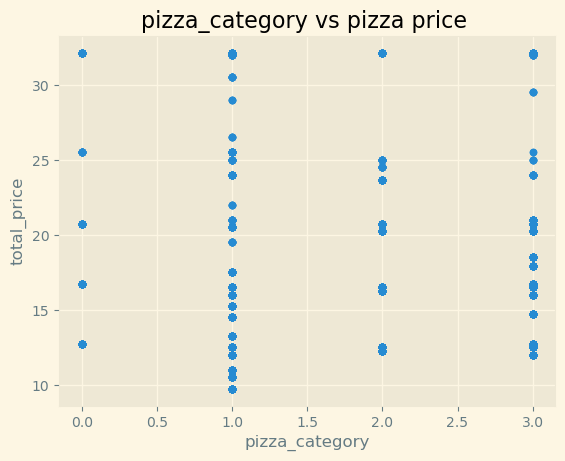

In [40]:
df.plot.scatter(x='pizza_category', y='total_price', title='pizza_category vs pizza price ')

# Homoscedasicity

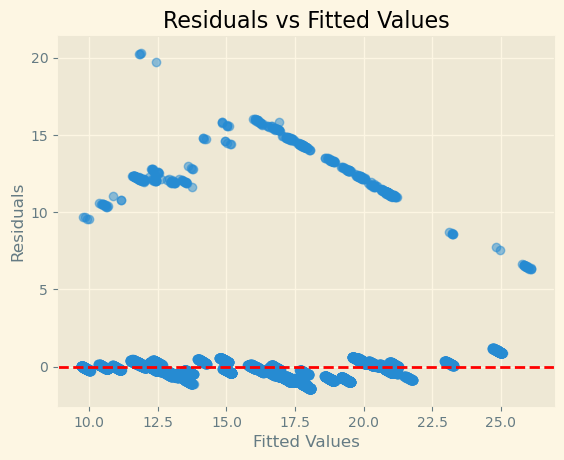

In [41]:

# Create a scatter plot of residuals vs fitted values
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Normality 

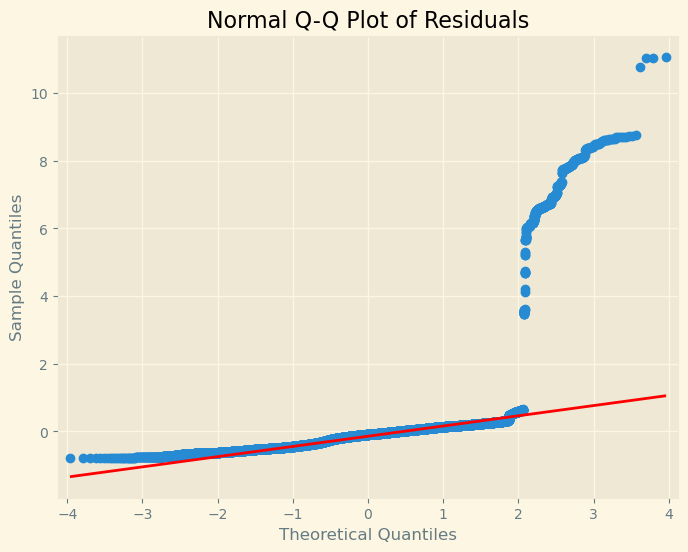

In [42]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(train_residuals, line='q', ax=ax, fit=True)
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [43]:
#Prediction of Test Data
df_test=pd.concat([X_test,y_test],axis=1)
df_test.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,total_price
29825,20835,11214,26,0,219,6746,13,0,1,22,12,16.50
24778,17291,9285,4,0,182,7055,22,2,2,2,2,23.65
33294,23316,12536,21,0,245,8233,16,0,3,21,9,17.95
2296,1583,859,0,0,16,13432,20,0,0,1,0,20.75
34416,24122,12952,17,0,253,7542,19,0,1,19,7,20.50


## Decision Tree

In [44]:
# Putting feature variable to X
X = df.drop('total_price', axis= 1)

# Putting response variable to y
y = df[['total_price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=42)

In [45]:
independent_variable = list(train.columns[1:])
independent_variable

['unit_price', 'pizza_size', 'pizza_category', 'pizza_name', 'total_price']

In [69]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import Tree Classifier model
from sklearn import tree

# Create the decision tree classifier object
dt = tree.DecisionTreeClassifier()  # By default, it uses the Gini index for splitting

# Train the model using the training sets
dt.fit(X_train, y_train)



DecisionTreeClassifier()

In [47]:
unique_classes = np.unique(y)

InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array([ 9.75 , 10.5  , 11.   , 12.   , 12.25 , 12.5  , 12.75 , 13.25 ,
       14.5  , 14.75 , 15.25 , 16.   , 16.25 , 16.5  , 16.75 , 17.5  ,
       17.95 , 18.5  , 19.5  , 20.25 , 20.5  , 20.75 , 21.   , 22.   ,
       23.65 , 24.   , 24.5  , 25.   , 25.5  , 26.5  , 29.   , 29.5  ,
       30.5  , 32.   , 32.125]) instead.

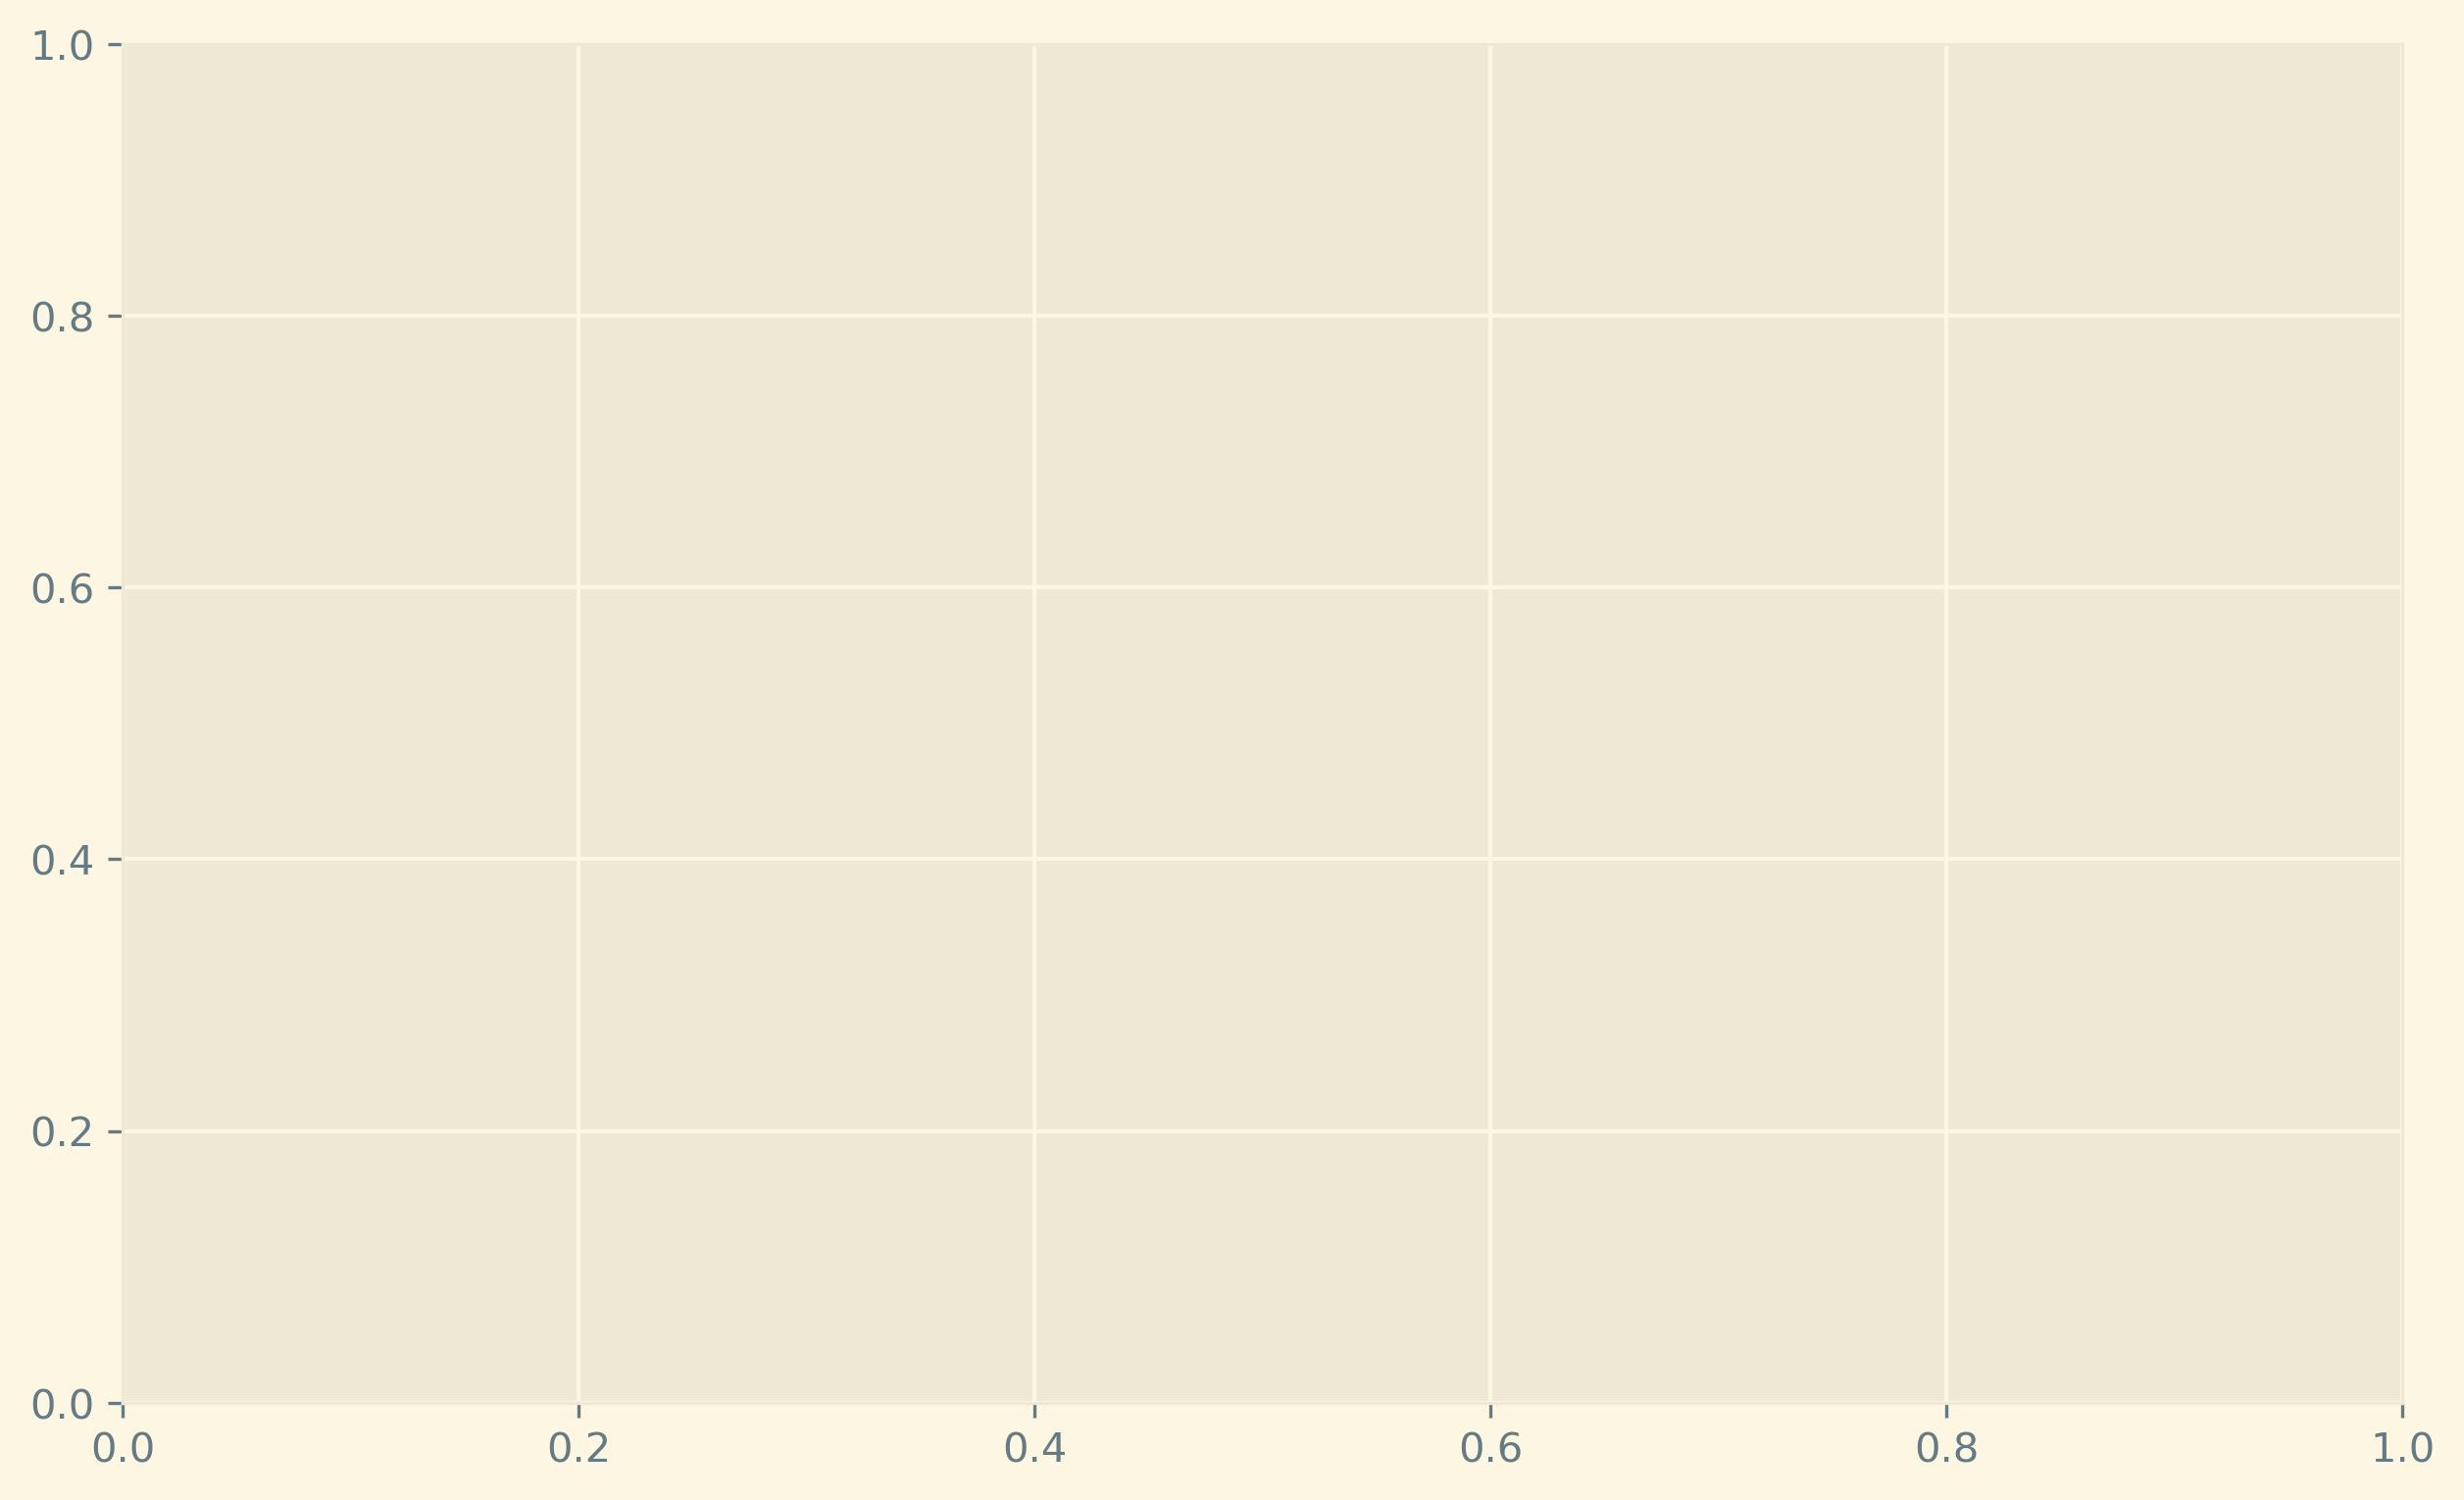

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Define the price range
price_range = ['0', '1', '2', '3']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=300)
tree.plot_tree(dt,  # Model
               feature_names=independent_variable,  # column name
               class_names=label_encoder.inverse_transform(unique_classes),  # Actual class labels
               filled=True,  # color
               node_ids=True,  # node number
               fontsize=10)  # Increase the font size for better visibility

In [50]:
train.head()

,order_time,unit_price,pizza_size,pizza_category,pizza_name,total_price
34249,3831,0,2,1,20,9.75
40805,9106,19,0,1,7,20.50
46745,3036,13,1,2,28,16.50
37739,974,20,0,0,4,20.75
31960,10818,10,0,1,20,15.25


In [51]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,order_time,unit_price,pizza_size,pizza_category,pizza_name,total_price,Predicted
34249,3831,0,2,1,20,9.75,0
40805,9106,19,0,1,7,20.50,20
46745,3036,13,1,2,28,16.50,13
37739,974,20,0,0,4,20.75,21
31960,10818,10,0,1,20,15.25,10


In [53]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['total_price'])
print(matrix)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets